✅ Dataset Loaded

📄 Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

❓ Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🔡 One-Hot Encoding Completed. New Columns:
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


C:\Users\kondu\AppData\Local\Temp\ipykernel_14432\1338286856.py:42: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("eda_age_vs_charges.png")
C:\Users\kondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


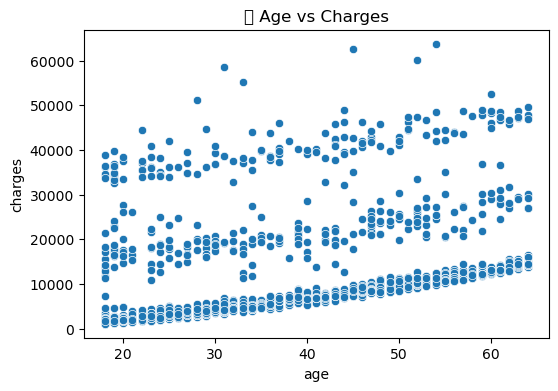

C:\Users\kondu\AppData\Local\Temp\ipykernel_14432\1338286856.py:49: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.savefig("eda_bmi_vs_charges.png")
C:\Users\kondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


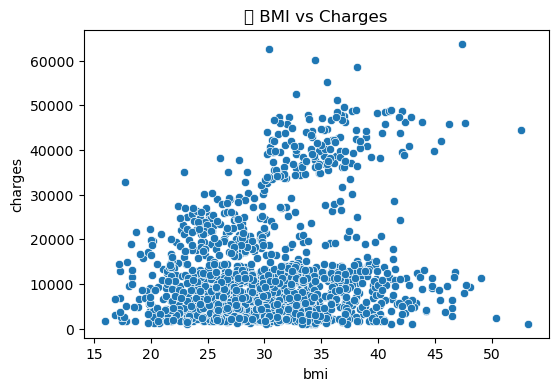

C:\Users\kondu\AppData\Local\Temp\ipykernel_14432\1338286856.py:57: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.savefig("eda_smoker_vs_charges.png")
C:\Users\kondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


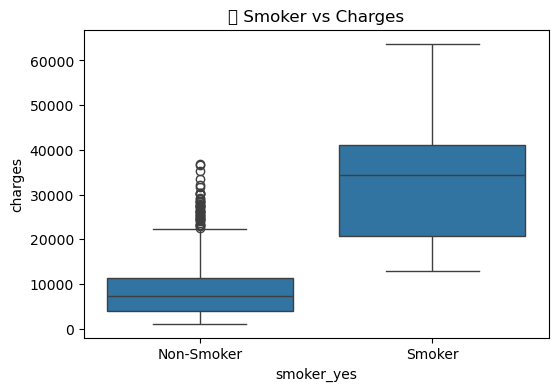

C:\Users\kondu\AppData\Local\Temp\ipykernel_14432\1338286856.py:64: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.savefig("correlation_heatmap.png")
C:\Users\kondu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


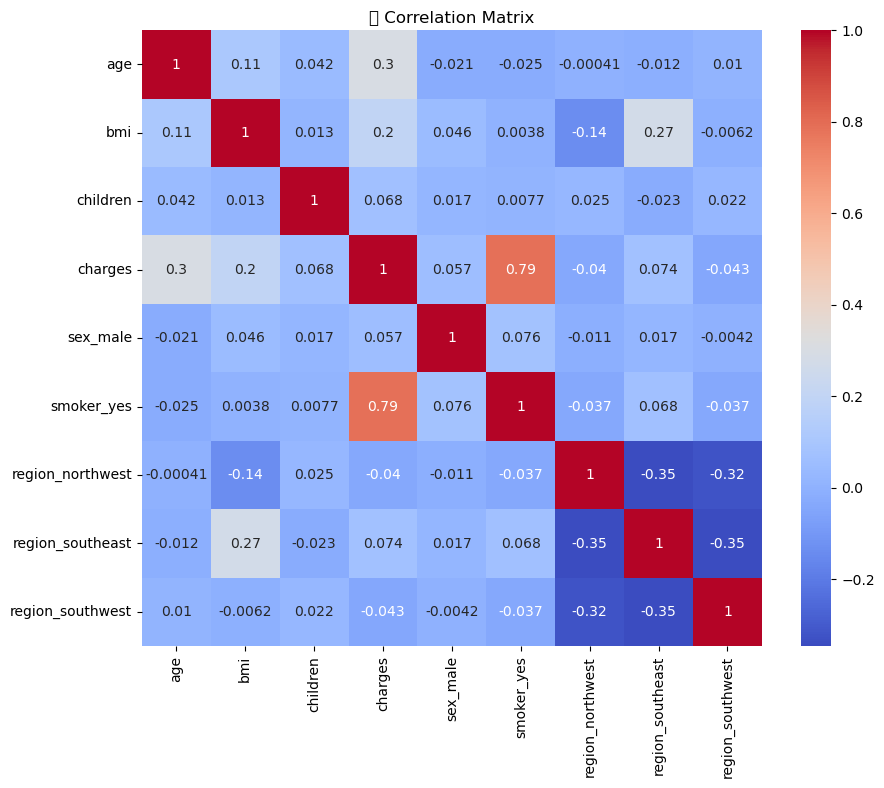


📊 Mutual Information Scores:
            Feature  Mutual Information
0               age            1.499642
4        smoker_yes            0.369171
3          sex_male            0.176660
2          children            0.161400
1               bmi            0.074760
5  region_northwest            0.057682
6  region_southeast            0.035070
7  region_southwest            0.002621

✅ Train-test split completed.
Training Size: 1070, Testing Size: 268

🚀 Linear Regression model trained.
💾 Predictions saved to 'final_predictions.csv'

📋 Final Model Evaluation:
R² Score: 0.7836
Mean Squared Error: 33596915.85
📁 Metrics saved to 'final_metrics.txt'


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression

# 📥 2. Load Dataset
df = pd.read_csv("C:/Users/kondu/Downloads/insurance.csv")

  # Use correct path if different
print("✅ Dataset Loaded")

# 🔍 3. Initial Data Check
print("\n📄 Initial Data Info:")
print(df.info())  # Overview of datatypes, non-null counts

print("\n❓ Missing Values:")
print(df.isnull().sum())  # Checking for nulls

# 🔄 4. Encode Categorical Variables
# Convert categorical columns into numerical using one-hot encoding
categorical_cols = ['sex', 'smoker', 'region']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\n🔡 One-Hot Encoding Completed. New Columns:")
print(df.columns)

# 🎯 5. Define Features and Target
X = df.drop('charges', axis=1)  # Features
y = df['charges']               # Target variable

# 🔬 6. Exploratory Data Analysis (EDA)

# 📊 (i) Age vs Charges
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='charges')
plt.title("📈 Age vs Charges")
plt.savefig("eda_age_vs_charges.png")
plt.show()

# 📊 (ii) BMI vs Charges
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title("📈 BMI vs Charges")
plt.savefig("eda_bmi_vs_charges.png")
plt.show()

# 📊 (iii) Smoker vs Charges (using encoded column 'smoker_yes')
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['smoker_yes'], y=df['charges'])
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.title("📊 Smoker vs Charges")
plt.savefig("eda_smoker_vs_charges.png")
plt.show()

# 🔗 (iv) Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Correlation Matrix")
plt.savefig("correlation_heatmap.png")
plt.show()

# 🧠 7. Feature Importance using Mutual Information
mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("\n📊 Mutual Information Scores:")
print(mi_df)
mi_df.to_csv("feature_mutual_info.csv", index=False)

# ✂ 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n✅ Train-test split completed.")
print(f"Training Size: {X_train.shape[0]}, Testing Size: {X_test.shape[0]}")

# 🧪 9. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\n🚀 Linear Regression model trained.")

# 🔮 10. Predict on Test Set
y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.to_csv("final_predictions.csv", index=False)
print("💾 Predictions saved to 'final_predictions.csv'")

# 📈 11. Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Save metrics to a file
with open("final_metrics.txt", "w") as f:
    f.write(f"R² Score: {r2:.4f}\n")
    f.write(f"Mean Squared Error: {mse:.2f}\n")

print("\n📋 Final Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print("📁 Metrics saved to 'final_metrics.txt'")